In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the required libraries

In [ ]:
!pip install copula
!pip install copulas

In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import math
import copy
from sklearn.linear_model import LogisticRegression

# Working on Drought index (SPEI) and maximum temperature (Tmax) dataset

## Loading the datsets

In [3]:
spei = loadmat('/content/drive/My Drive/Project_3rd_Sem/SPEI12_GEV.mat')
maxt = loadmat('/content/drive/My Drive/Project_3rd_Sem/india_maxT.mat')

In [4]:
print(spei.keys())
print(maxt.keys())
print(type(spei["SPEI12_GEV"]), spei["SPEI12_GEV"].shape)
print(type(maxt["monthly_max"]), maxt["monthly_max"].shape)

dict_keys(['__header__', '__version__', '__globals__', 'SPEI12_GEV'])
dict_keys(['__header__', '__version__', '__globals__', 'monthly_max'])
<class 'numpy.ndarray'> (121, 121, 768)
<class 'numpy.ndarray'> (121, 121, 768)


In [5]:
spei = spei['SPEI12_GEV']
maxt = maxt['monthly_max']

## Data Pre-processing

### Testing the dataset values in one grid

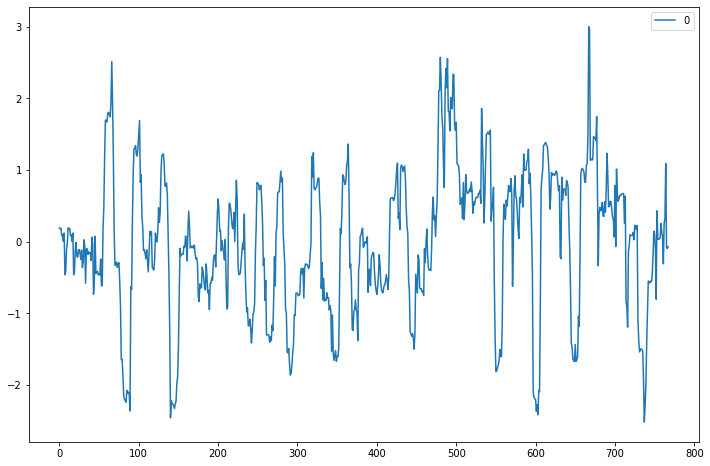

In [ ]:
p = pd.DataFrame(spei[75][50])
p.plot(figsize=(12,8));

In [ ]:
import copy
l = maxt[75][50]
percentile_threshold = .75 * len(l)
l1 = copy.deepcopy(l)  
l1.sort()

In [ ]:
percentile_threshold = (int)(percentile_threshold)
thresh_val = l1[percentile_threshold]
thresh_val

33.648978448683216

In [ ]:
print(maxt[75][50].max())
print(maxt[75][50].min())
print(spei[75][50].max())
print(spei[75][50].min())

37.807777616712784
25.507473104743546
3.0
-2.5149702946161168


## Creating a data frame object having all the drought index and Tmax values

In [6]:
data = []
for i in range(spei.shape[0]):
  data.append([])
  for j in range(spei.shape[1]):
    data[i].append([])
    total_len = len(spei[i][j])
    k = 0
    year = 0
    year_spei = []
    year_maxt = []
    while k < total_len:
      c = 1
      sum_spei = 0
      sum_maxt = 0
      while c <= 12:
        sum_spei += spei[i][j][k]
        sum_maxt += maxt[i][j][k]
        k += 1
        c += 1
      year_spei.append(sum_spei/12)
      year_maxt.append(sum_maxt/12)
    data[i][j] = (year_spei, year_maxt)

## Plotting the values of drought index and maximum temperature over the years 1951-2015

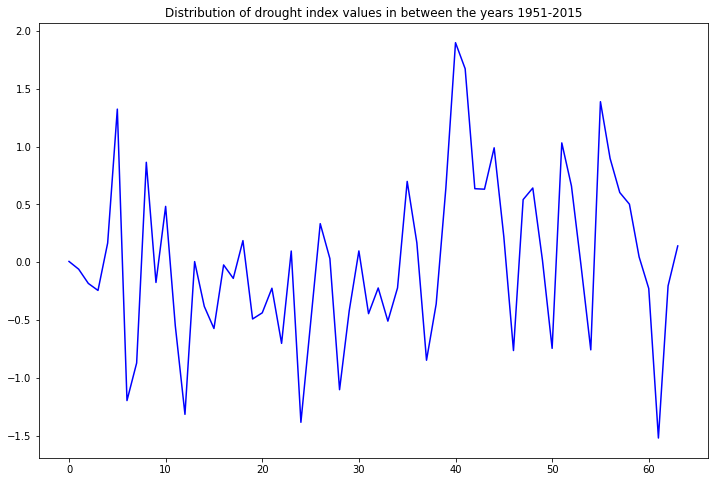

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data[75][50][0], color='blue', label='Sine wave')
plt.title("Distribution of drought index values in between the years 1951-2015")
plt.show()

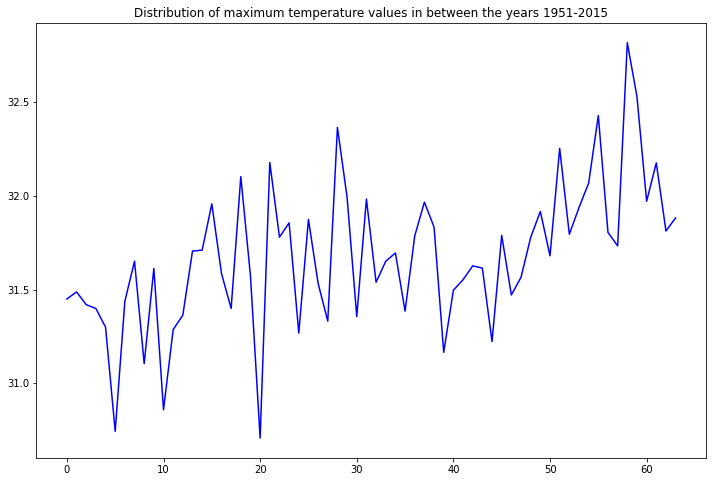

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data[75][50][1], color='blue')
plt.title("Distribution of maximum temperature values in between the years 1951-2015")
plt.show()

#### We can see that there is a general upward trend in the maximum temperature over the years. This can be seen for all regions, which is mainly due to the global warming effects over the years.

## EXPERIMENTS

### Drought is mainly classified into 3 types :

*   Moderate drought : SPEI values between -1.0 and -1.49
*   Severe drought : SPEI values between -1.5 and -1.99
*   Extreme drought : SPEI values less than -2.0

### For temperature we use several thresholds of 75 percentile, 80 percentile, 90 percentile and 95 percentile




# Moderate drought condition : SPEI values between -1.0 and -1.49

## Labelling the dataset using a TMax threshold of 75 percentile

In [31]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .75 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if (plist[x] <= -1 and plist[x] >= -1.49) or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 80 percentile

In [34]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .80 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if (plist[x] <= -1 and plist[x] >= -1.49) or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 90 percentile

In [37]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .90 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if (plist[x] <= -1 and plist[x] >= -1.49) or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 95 percentile

In [40]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .95 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if (plist[x] <= -1 and plist[x] >= -1.49) or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Calculating the probability of risk given temperature and drought index data

In [41]:
prisk = []
prisk_trend = []
for i in range(spei.shape[0]):
  prisk.append([])
  prisk_trend.append([])
  for j in range(spei.shape[1]):
    prisk[i].append([])
    prisk_trend[i].append([])
    X_train = pd.DataFrame()
    X_train['precip'] = data[i][j][0]
    X_train['temp'] = data[i][j][1]
    X_train = X_train.to_numpy()
    X_train.astype(float)
    y = labels[i][j]
    if np.count_nonzero(y) == 0:
      prisk[i][j] = 0
      continue
    elif np.count_nonzero(y) == 64:
      prisk[i][j] = 0
      continue
    model = LogisticRegression()
    model.fit(X_train, labels[i][j])
    b0 = model.intercept_[0]
    b1 = model.coef_[0][0]
    b2 = model.coef_[0][1]
    value = b0 + b1 + b2
    value1 = math.exp(value) + 1
    ans = model.predict_proba(X_train)
    prisk_trend[i][j] = ans
    prisk[i][j] = np.amax(ans[:,1])

# Joint Probability using Copula methodolgy

In [ ]:
from copula import pyCopula
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d
import matplotlib
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
spei = loadmat('/content/drive/My Drive/Project_3rd_Sem/SPEI12_GEV.mat')
maxt = loadmat('/content/drive/My Drive/Project_3rd_Sem/india_maxT.mat')
spei = spei['SPEI12_GEV']
maxt = maxt['monthly_max']
print(spei.shape)
print(maxt.shape)

(121, 121, 768)
(121, 121, 768)


## Testing on one grid point

In [ ]:
i = 75
j = 50
X_train = pd.DataFrame()
X_train['spei'] = data[i][j][0]
X_train['maxt'] = data[i][j][1]
X_train['labels'] = labels[i][j]
X_train

,spei,maxt,labels
0,0.005809,31.449448,0
1,-0.061149,31.487191,0
2,-0.184349,31.419294,0
3,-0.244935,31.398811,0
4,0.165336,31.299347,0
...,...,...,...
59,0.045767,32.529304,1
60,-0.228315,31.971079,1
61,-1.521881,32.175968,1
62,-0.205636,31.812283,0


In [ ]:
column_values = ['spei', 'maxt']
df = pd.DataFrame(data = X_train, columns = column_values) 

In [ ]:
import copy
X_train = copy.deepcopy(df)

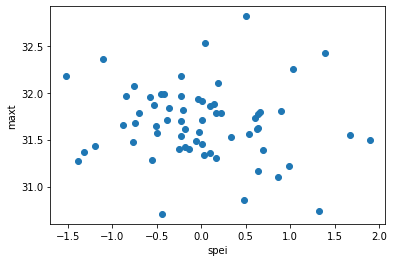

In [ ]:
from copulas.visualization import scatter_2d
import matplotlib.pyplot as plt
%matplotlib inline

scatter_2d(df)

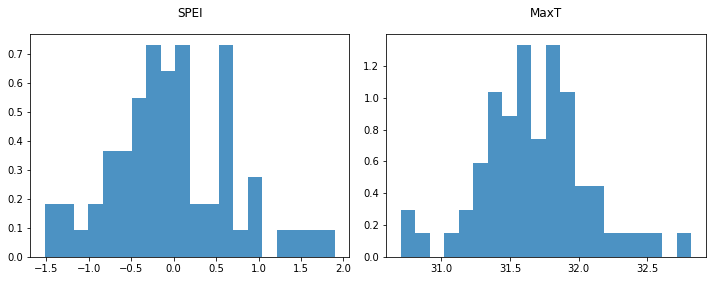

In [ ]:
from copulas.visualization import hist_1d, side_by_side

side_by_side(hist_1d, {'SPEI': X_train['spei'], 'MaxT': X_train['maxt']})

In [ ]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()
copula.fit(X_train)

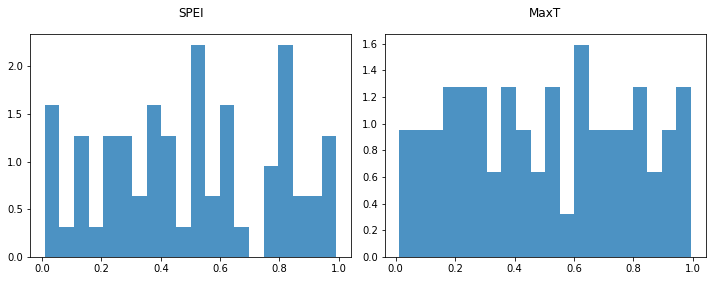

In [ ]:
spei_cdf = copula.univariates[0].cdf(X_train['spei'])
maxt_cdf = copula.univariates[1].cdf(X_train['maxt'])

side_by_side(hist_1d, {'SPEI': spei_cdf, 'MaxT': maxt_cdf})

In [ ]:
synthetic = copula.sample(len(X_train))
synthetic.head()

,spei,maxt
0,0.343861,31.670084
1,0.312293,31.638303
2,-0.084616,30.916089
3,0.538806,32.377117
4,-0.382134,31.612261


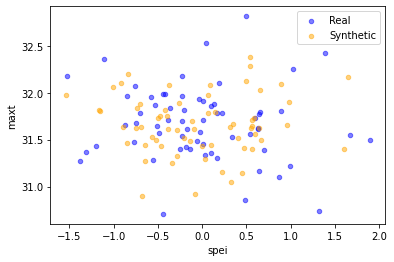

In [ ]:
from copulas.visualization import compare_2d
compare_2d(X_train, synthetic)

In [ ]:
probability_density = copula.pdf(synthetic)

In [ ]:
print(len(probability_density))
print(probability_density)

64
[0.13906114 0.14213948 0.02568239 0.01942118 0.13821997 0.00447628
 0.04906396 0.137184   0.08675638 0.05496642 0.04018458 0.14280972
 0.08986746 0.14832477 0.04619827 0.02707798 0.10454611 0.10714195
 0.07883382 0.09889985 0.15881581 0.12549902 0.0888942  0.07941759
 0.14591585 0.0124468  0.05153461 0.12713591 0.11440898 0.13836268
 0.08728146 0.12876856 0.03411929 0.11262352 0.07774333 0.05148973
 0.03330266 0.10690302 0.09070203 0.12831997 0.12337073 0.11566667
 0.09944173 0.00732017 0.10816764 0.06777363 0.08919044 0.15704792
 0.05901608 0.09979713 0.05918604 0.12781588 0.12602428 0.09420787
 0.03482446 0.13683486 0.03146822 0.01589909 0.03719566 0.1048996
 0.10503468 0.0663552  0.06860993 0.03574047]


In [ ]:
X_train = pd.DataFrame()
X_train['spei'] = data[i][j][0]
X_train['maxt'] = data[i][j][1]
copula = GaussianMultivariate()
copula.fit(X_train)
synthetic = copula.sample(len(X_train))
probability_density = copula.pdf(synthetic)

## Testing on entire data

In [ ]:
prob_risk = []
for i in range(spei.shape[0]):
  prob_risk.append([])
  print(i)
  for j in range(spei.shape[1]):
    prob_risk[i].append([])
    X_train = pd.DataFrame()
    X_train['spei'] = data[i][j][0]
    X_train['maxt'] = data[i][j][1]
    copula = GaussianMultivariate()
    copula.fit(X_train)
    synthetic = copula.sample(len(X_train))
    probability_density = copula.pdf(synthetic)
    joint_prob = sum(probability_density/len(probability_density))
    prob_risk[i][j] = joint_prob * prisk[i][j]

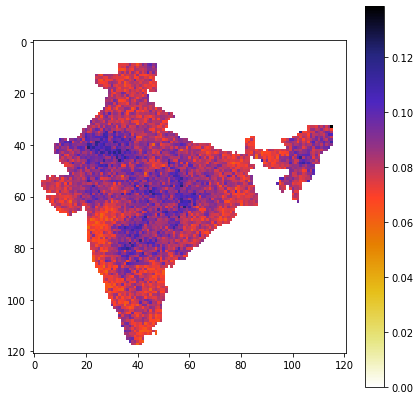

In [ ]:
plt.figure(figsize=(7,7))
prob_risk = np.rot90(prob_risk, 1)
plt.imshow(prob_risk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Probability of risk calculation

In [ ]:
for i in range(spei.shape[0]):
  for j in range(spei.shape[1]):
    X_train = pd.DataFrame()
    X_train['precip'] = data[i][j][0]
    X_train['temp'] = data[i][j][1]
    X_train = X_train.to_numpy()
    X_train.astype(float)
    y = labels[i][j]
    if np.count_nonzero(y) == 0:
      prisk[i][j] = 0
      continue
    elif np.count_nonzero(y) == 64:
      prisk[i][j] = 0
      continue
    temp_list = [prisk[i][j] * prob_risk[i][j] for i in range(len(prisk[i][j]))]
    ans = sum(temp_list)
    prisk[i][j] = ans

# Displaying the results

## Using a TMax threshold of 75 percentile

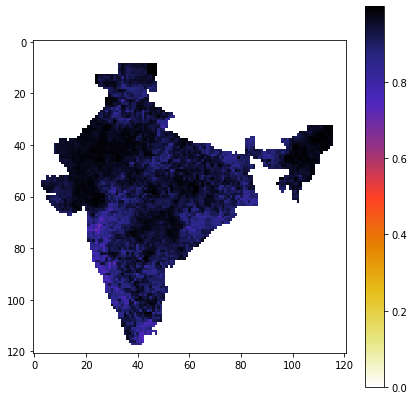

In [33]:
prisk_75p_moderate = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 80 percentile

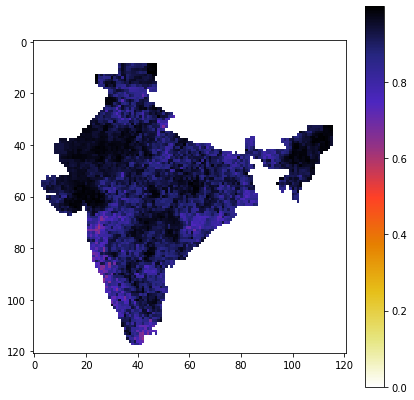

In [36]:
prisk_80p_moderate = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 90 percentile

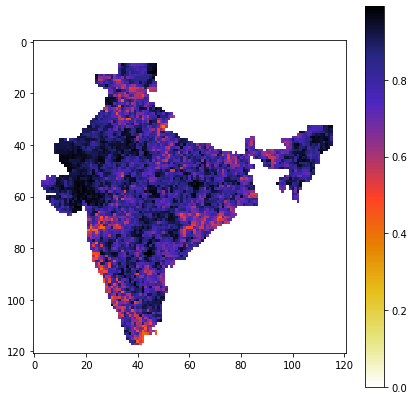

In [39]:
prisk_90p_moderate = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 95 percentile

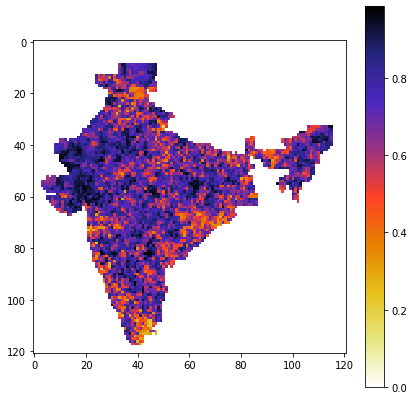

In [42]:
prisk_95p_moderate = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

# Comparison between the plots at different thresholds for moderate drought

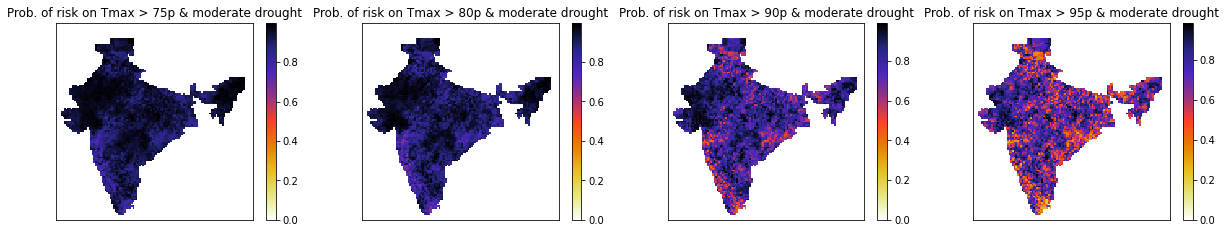

In [43]:
prisk_list = [prisk_75p_moderate, prisk_80p_moderate, prisk_90p_moderate, prisk_95p_moderate]
title = ['Prob. of risk on Tmax > 75p & moderate drought', 'Prob. of risk on Tmax > 80p & moderate drought', 'Prob. of risk on Tmax > 90p & moderate drought', 'Prob. of risk on Tmax > 95p & moderate drought']
fig=plt.figure(figsize=(21,21))
counter = 0
for i in range(1, 5):
    fig.add_subplot(5, 4, i)
    id = prisk_list[counter]
    id = np.rot90(id, 1)
    plt.imshow(id, cmap='CMRmap_r', interpolation='nearest')
    plt.colorbar()
    plt.xticks([]),plt.yticks([])
    plt.title(title[counter])
    counter += 1
plt.show()

#### We can see from the above figures that for moderate drought conditions, regions closer to desert areas like Rajasthan having high temperature or places in the North-East having high rainfall have a higher probability of risk as compared to the other areas. This is because temperature or rainfall values are extreme in these areas. Also, areas close to Andhra Pradhesh or Chattisgarh are classifies as high risk zones mainly due to the continental climate they experience because of being far away from the sea. In comparison, regions in the south-west coast can be seen as having lower probability of risk, since these regions experience moderate temperature and rainfall throughout the year. As we increase the maximum temperature threshold, lesser regions show possibilities of risk, since they do not cross the higher temperature threshold needed for it to be classified with risk.

# Severe drought condition

## Labelling the dataset using a TMax threshold of 75 percentile

In [44]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .75 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if (plist[x] <= -1.5 and plist[x] >= -1.99) or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 80 percentile

In [47]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .80 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if (plist[x] <= -1.5 and plist[x] >= -1.99) or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 90 percentile

In [50]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .90 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if (plist[x] <= -1.5 and plist[x] >= -1.99) or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 95 percentile

In [53]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .95 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if (plist[x] <= -1.5 and plist[x] >= -1.99) or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Calculating the probability of risk given temperature and drought index data

In [54]:
prisk = []
prisk_trend = []
for i in range(spei.shape[0]):
  prisk.append([])
  prisk_trend.append([])
  for j in range(spei.shape[1]):
    prisk[i].append([])
    prisk_trend[i].append([])
    X_train = pd.DataFrame()
    X_train['precip'] = data[i][j][0]
    X_train['temp'] = data[i][j][1]
    X_train = X_train.to_numpy()
    X_train.astype(float)
    y = labels[i][j]
    if np.count_nonzero(y) == 0:
      prisk[i][j] = 0
      continue
    elif np.count_nonzero(y) == 64:
      prisk[i][j] = 0
      continue
    model = LogisticRegression()
    model.fit(X_train, labels[i][j])
    b0 = model.intercept_[0]
    b1 = model.coef_[0][0]
    b2 = model.coef_[0][1]
    value = b0 + b1 + b2
    value1 = math.exp(value) + 1
    ans = model.predict_proba(X_train)
    prisk_trend[i][j] = ans
    prisk[i][j] = np.amax(ans[:,1])

# Joint Probability using Copula methodolgy

In [ ]:
from copula import pyCopula
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d
import matplotlib
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
spei = loadmat('/content/drive/My Drive/Project_3rd_Sem/SPEI12_GEV.mat')
maxt = loadmat('/content/drive/My Drive/Project_3rd_Sem/india_maxT.mat')
spei = spei['SPEI12_GEV']
maxt = maxt['monthly_max']
print(spei.shape)
print(maxt.shape)

(121, 121, 768)
(121, 121, 768)


In [ ]:
prob_risk = []
for i in range(spei.shape[0]):
  prob_risk.append([])
  print(i)
  for j in range(spei.shape[1]):
    prob_risk[i].append([])
    X_train = pd.DataFrame()
    X_train['spei'] = data[i][j][0]
    X_train['maxt'] = data[i][j][1]
    copula = GaussianMultivariate()
    copula.fit(X_train)
    synthetic = copula.sample(len(X_train))
    probability_density = copula.pdf(synthetic)
    joint_prob = sum(probability_density/len(probability_density))
    prob_risk[i][j] = joint_prob * prisk[i][j]

## Probability of risk calculation

In [ ]:
for i in range(spei.shape[0]):
  for j in range(spei.shape[1]):
    X_train = pd.DataFrame()
    X_train['precip'] = data[i][j][0]
    X_train['temp'] = data[i][j][1]
    X_train = X_train.to_numpy()
    X_train.astype(float)
    y = labels[i][j]
    if np.count_nonzero(y) == 0:
      prisk[i][j] = 0
      continue
    elif np.count_nonzero(y) == 64:
      prisk[i][j] = 0
      continue
    temp_list = [prisk[i][j] * prob_risk[i][j] for i in range(len(prisk[i][j]))]
    ans = sum(temp_list)
    prisk[i][j] = ans

# Displaying the results

## Using a TMax threshold of 75 percentile

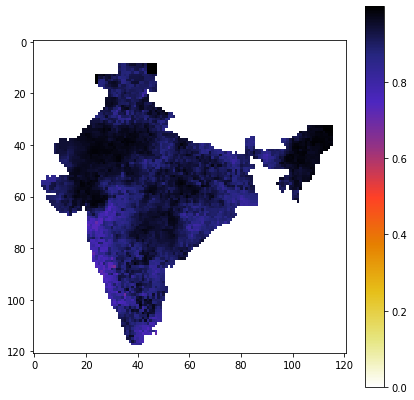

In [46]:
prisk_75p_severe = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 80 percentile

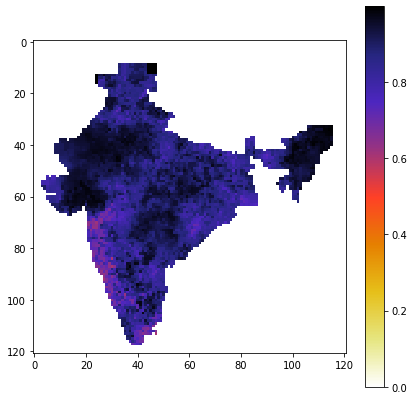

In [49]:
prisk_80p_severe = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 90 percentile

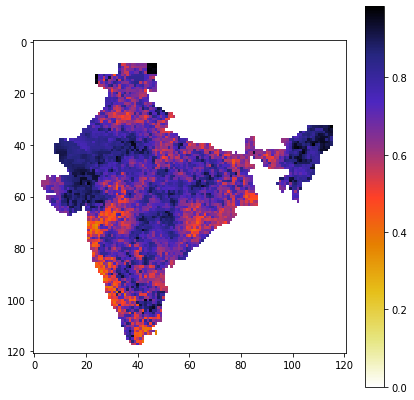

In [52]:
prisk_90p_severe = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 95 percentile

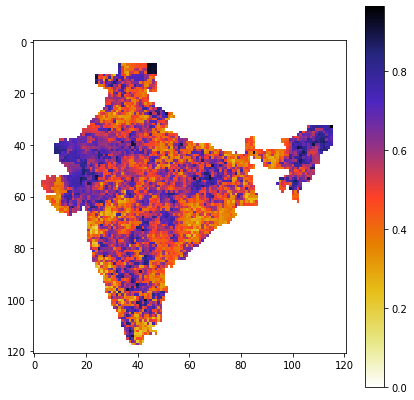

In [55]:
prisk_95p_severe = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

# Comparison between the plots at different thresholds for severe drought

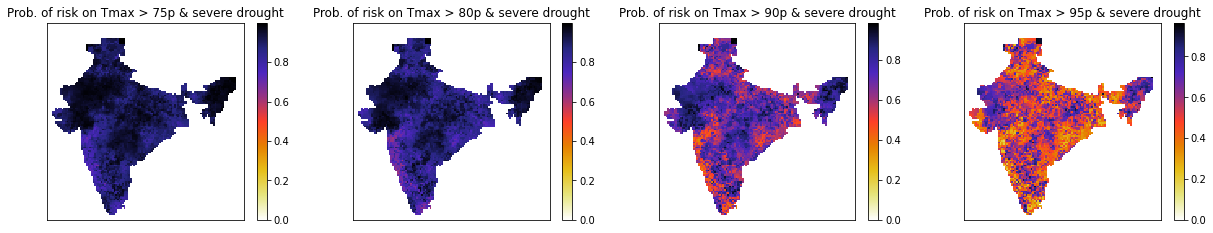

In [56]:
prisk_list = [prisk_75p_severe, prisk_80p_severe, prisk_90p_severe, prisk_95p_severe]
title = ['Prob. of risk on Tmax > 75p & severe drought', 'Prob. of risk on Tmax > 80p & severe drought', 'Prob. of risk on Tmax > 90p & severe drought', 'Prob. of risk on Tmax > 95p & severe drought']
fig=plt.figure(figsize=(21,21))
counter = 0
for i in range(1, 5):
    fig.add_subplot(5, 4, i)
    id = prisk_list[counter]
    id = np.rot90(id, 1)
    plt.imshow(id, cmap='CMRmap_r', interpolation='nearest')
    plt.colorbar()
    plt.xticks([]),plt.yticks([])
    plt.title(title[counter])
    counter += 1
plt.show()

#### We can see from the above figures that for severe drought conditions lesser regions come under high risk zones, which is because of the low value of SPEI that needs to be there for it to be classified as severe drought. Regions closer to desert areas like Rajasthan having high temperature or places in the North-East having high rainfall have a higher probability of risk as compared to the other areas. This is because temperature or rainfall values are extreme in these areas. In comparison, regions in the south-west coast can be seen as having lower probability of risk, since these regions experience moderate temperature and rainfall throughout the year. As we increase the maximum temperature threshold, lesser regions show possibilities of risk, since they do not cross the higher temperature threshold needed for it to be classified with risk.

# Extreme drought condition

## Labelling the dataset using a TMax threshold of 75 percentile

In [7]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .75 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if plist[x] <= -2 or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 80 percentile

In [13]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .80 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if plist[x] <= -2 or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 90 percentile

In [16]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .90 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if plist[x] <= -2 or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 95 percentile

In [19]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .95 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if plist[x] <= -2 or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Calculating the probability of risk using temperature and drought index data

In [ ]:
prisk = []
prisk_trend = []
for i in range(spei.shape[0]):
  prisk.append([])
  prisk_trend.append([])
  for j in range(spei.shape[1]):
    prisk[i].append([])
    prisk_trend[i].append([])
    X_train = pd.DataFrame()
    X_train['precip'] = data[i][j][0]
    X_train['temp'] = data[i][j][1]
    X_train = X_train.to_numpy()
    X_train.astype(float)
    y = labels[i][j]
    if np.count_nonzero(y) == 0:
      prisk[i][j] = 0
      continue
    elif np.count_nonzero(y) == 64:
      prisk[i][j] = 0
      continue
    model = LogisticRegression()
    model.fit(X_train, labels[i][j])
    b0 = model.intercept_[0]
    b1 = model.coef_[0][0]
    b2 = model.coef_[0][1]
    value = b0 + b1 + b2
    value1 = math.exp(value) + 1
    ans = model.predict_proba(X_train)
    prisk_trend[i][j] = ans
    prisk[i][j] = np.amax(ans[:,1])

# Joint Probability using Copula methodolgy

In [ ]:
from copula import pyCopula
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d
import matplotlib
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
spei = loadmat('/content/drive/My Drive/Project_3rd_Sem/SPEI12_GEV.mat')
maxt = loadmat('/content/drive/My Drive/Project_3rd_Sem/india_maxT.mat')
spei = spei['SPEI12_GEV']
maxt = maxt['monthly_max']
print(spei.shape)
print(maxt.shape)

(121, 121, 768)
(121, 121, 768)


In [ ]:
prob_risk = []
for i in range(spei.shape[0]):
  prob_risk.append([])
  print(i)
  for j in range(spei.shape[1]):
    prob_risk[i].append([])
    X_train = pd.DataFrame()
    X_train['spei'] = data[i][j][0]
    X_train['maxt'] = data[i][j][1]
    copula = GaussianMultivariate()
    copula.fit(X_train)
    synthetic = copula.sample(len(X_train))
    probability_density = copula.pdf(synthetic)
    joint_prob = sum(probability_density/len(probability_density))
    prob_risk[i][j] = joint_prob * prisk[i][j]

## Probability of risk calculation

In [20]:
for i in range(spei.shape[0]):
  for j in range(spei.shape[1]):
    X_train = pd.DataFrame()
    X_train['precip'] = data[i][j][0]
    X_train['temp'] = data[i][j][1]
    X_train = X_train.to_numpy()
    X_train.astype(float)
    y = labels[i][j]
    if np.count_nonzero(y) == 0:
      prisk[i][j] = 0
      continue
    elif np.count_nonzero(y) == 64:
      prisk[i][j] = 0
      continue
    temp_list = [prisk[i][j] * prob_risk[i][j] for i in range(len(prisk[i][j]))]
    ans = sum(temp_list)
    prisk[i][j] = ans

# Displaying the results

## Using a TMax threshold of 75 percentile

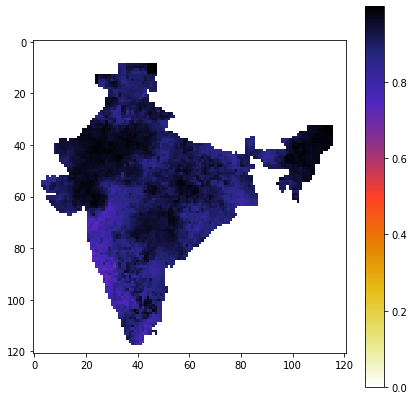

In [9]:
prisk_75p_extreme = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 80 percentile

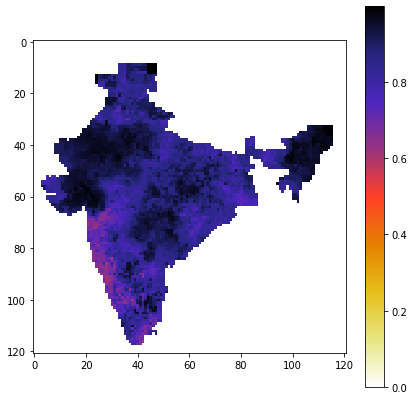

In [15]:
prisk_80p_extreme = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 90 percentile

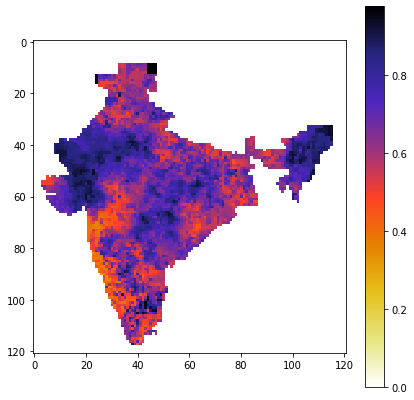

In [18]:
prisk_90p_extreme = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 95 percentile

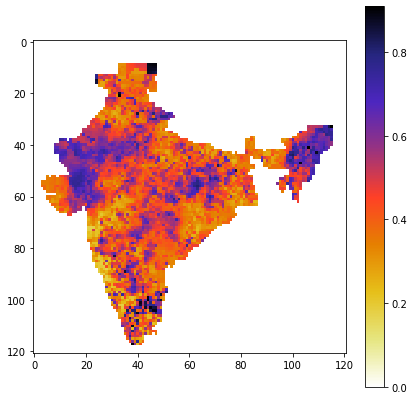

In [21]:
prisk_95p_extreme = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

# Comparison between the plots at different thresholds for extreme drought

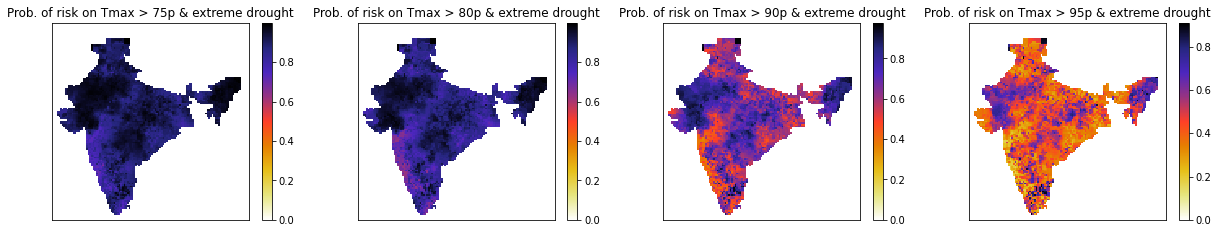

In [27]:
prisk_list = [prisk_75p_extreme, prisk_80p_extreme, prisk_90p_extreme, prisk_95p_extreme]
title = ['Prob. of risk on Tmax > 75p & extreme drought', 'Prob. of risk on Tmax > 80p & extreme drought', 'Prob. of risk on Tmax > 90p & extreme drought', 'Prob. of risk on Tmax > 95p & extreme drought']
fig=plt.figure(figsize=(21,21))
counter = 0
for i in range(1, 5):
    fig.add_subplot(5, 4, i)
    id = prisk_list[counter]
    id = np.rot90(id, 1)
    plt.imshow(id, cmap='CMRmap_r', interpolation='nearest')
    plt.colorbar()
    plt.xticks([]),plt.yticks([])
    plt.title(title[counter])
    counter += 1
plt.show()

#### We can see from the above figures that for extreme drought conditions, even lesser regions come under high risk zones. This s because of the high negative value of SPEI that needs to be there for it to be classified as extreme drought. Even with such strict conditions, regions closer to desert areas like Rajasthan having high temperature or places in the North-East having high rainfall have a higher probability of risk as compared to the other areas. This is because temperature or rainfall values are extreme in these areas. In comparison, regions in the south-west coast can be seen as having lower probability of risk, since these regions experience moderate temperature and rainfall throughout the year. As we increase the maximum temperature threshold, lesser regions show possibilities of risk, since they do not cross the higher temperature threshold needed for it to be classified with risk.

# Comparison of probability of risk at different temperature and drought index thresholds.
1.   Moderate drought (SPEI value between -1.0 and -1.49) and Tmax threshold 75 percentile
2.   Moderate drought (SPEI value between -1.0 and -1.49) and Tmax threshold 80 percentile
3.   Moderate drought (SPEI value between -1.0 and -1.49) and Tmax threshold 90 percentile
4.   Moderate drought (SPEI value between -1.0 and -1.49) and Tmax threshold 95 percentile
5.  Severe drought (SPEI value between -1.50 and -1.99) and Tmax threshold 75 percentile
6.  Severe drought (SPEI value between -1.50 and -1.99) and Tmax threshold 80 percentile
7.  Severe drought (SPEI value between -1.50 and -1.99) and Tmax threshold 90 percentile
8.  Severe drought (SPEI value between -1.50 and -1.99) and Tmax threshold 95 percentile
9.  Extreme drought (SPEI value less than -2.0) and Tmax threshold 75 percentile
10.  Extreme drought (SPEI value less than -2.0) and Tmax threshold 80 percentile
11.  Extreme drought (SPEI value less than -2.0) and Tmax threshold 90 percentile
12.  Extreme drought (SPEI value less than -2.0) and Tmax threshold 95 percentile



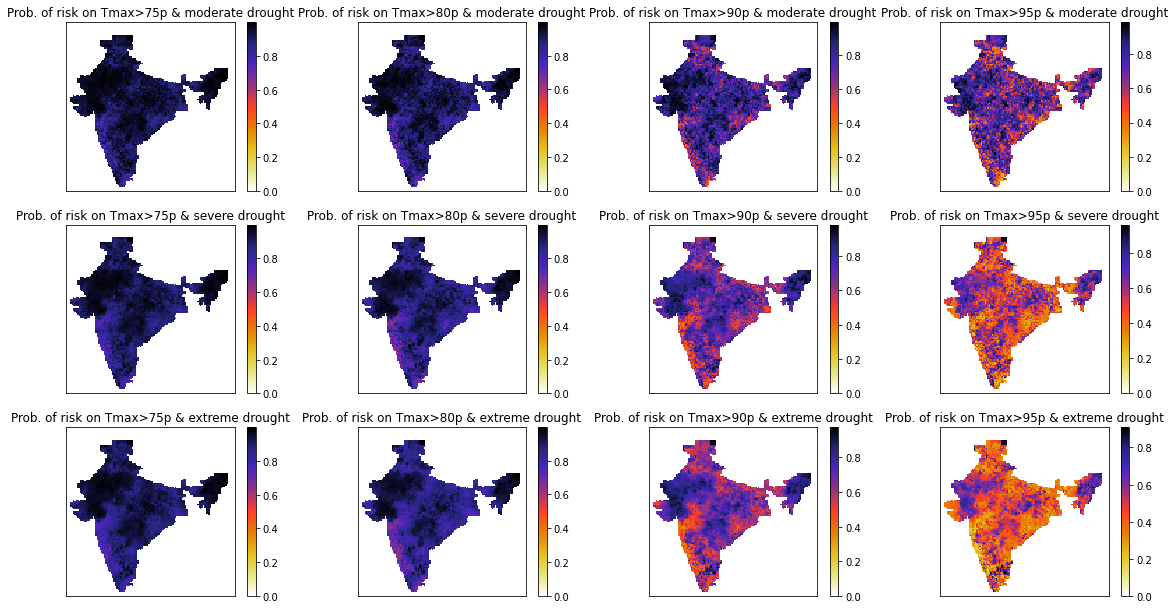

In [66]:
prisk_list = [prisk_75p_moderate, prisk_80p_moderate, prisk_90p_moderate, prisk_95p_moderate, prisk_75p_severe, prisk_80p_severe, prisk_90p_severe, prisk_95p_severe, prisk_75p_extreme, prisk_80p_extreme, prisk_90p_extreme, prisk_95p_extreme]
title = ['Prob. of risk on Tmax>75p & moderate drought', 'Prob. of risk on Tmax>80p & moderate drought', 'Prob. of risk on Tmax>90p & moderate drought', 'Prob. of risk on Tmax>95p & moderate drought', 'Prob. of risk on Tmax>75p & severe drought', 'Prob. of risk on Tmax>80p & severe drought', 'Prob. of risk on Tmax>90p & severe drought', 'Prob. of risk on Tmax>95p & severe drought', 'Prob. of risk on Tmax>75p & extreme drought', 'Prob. of risk on Tmax>80p & extreme drought', 'Prob. of risk on Tmax>90p & extreme drought', 'Prob. of risk on Tmax>95p & extreme drought']
fig=plt.figure(figsize=(20,18))
counter = 0
for i in range(1, 13):
    fig.add_subplot(5, 4, i)
    id = prisk_list[counter]
    id = np.rot90(id, 1)
    plt.imshow(id, cmap='CMRmap_r', interpolation='nearest')
    plt.colorbar()
    plt.xticks([]),plt.yticks([])
    plt.title(title[counter])
    counter += 1
plt.show()

#### The comparison of the plots at different temperature and drought index thresholds is shown in the figure. One observation that we can see is that areas like Rajasthan which experience high temperature and North-East India which experience high rainfall, comes under high risk zones all the time, i.e. starting from moderate to extreme drought zones. But areas in the Central India like the states of Chattisgarh or western parts of Andhra Pradhesh comes under high risk zone when classified as moderate to severe drought, but not in extreme drought cases. This is because of the continental climate they experience because of being far away from the sea. Regions in the western coast of India comes under low risk zones because of the moderate temperature and rainfall they experience almost throughout the year.

# Calculating risk only during monsoon season (June - September)

In [ ]:
data = []
for i in range(spei.shape[0]):
  data.append([])
  for j in range(spei.shape[1]):
    data[i].append([])
    total_len = len(spei[i][j])
    k = 0
    year = 0
    year_spei = []
    year_maxt = []
    while k < total_len:
      c = 1
      sum_spei = 0
      sum_maxt = 0
      while c <= 12:
        if c >= 6 and c <= 9 :
          sum_spei += spei[i][j][k]
          sum_maxt += maxt[i][j][k]
        k += 1
        c += 1
      year_spei.append(sum_spei/4)
      year_maxt.append(sum_maxt/4)
    data[i][j] = (year_spei, year_maxt)

## Labelling the dataset using a TMax threshold of 75 percentile

In [ ]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .75 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if plist[x] < -1.5 or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 80 percentile

In [ ]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .80 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if plist[x] < -1.5 or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 90 percentile

In [ ]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .90 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if plist[x] < -1.5 or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Labelling the dataset using a TMax threshold of 95 percentile

In [ ]:
labels = []
for i in range(spei.shape[0]):
  labels.append([])
  for j in range(spei.shape[1]):
    labels[i].append([])
    plist = []
    tlist = []
    y = []
    for entry in data[i][j][0]:
      plist.append(entry)
    for entry in data[i][j][1]:
      tlist.append(entry)
    l1 = copy.deepcopy(tlist)  
    l1.sort()
    percentile_threshold = .95 * len(l1)
    percentile_threshold = (int)(percentile_threshold)
    thresh_val = l1[percentile_threshold]
    for x in range(len(plist)):
      if plist[x] < -1.5 or tlist[x] >= thresh_val:
        y.append(1)
      else:
        y.append(0)
    labels[i][j] = y

## Calculating the probability of risk using temperature and drought index data

In [ ]:
prisk = []
for i in range(spei.shape[0]):
  prisk.append([])
  for j in range(spei.shape[1]):
    prisk[i].append([])
    X_train = pd.DataFrame()
    X_train['precip'] = data[i][j][0]
    X_train['temp'] = data[i][j][1]
    X_train = X_train.to_numpy()
    X_train.astype(float)
    y = labels[i][j]
    if np.count_nonzero(y) == 0:
      prisk[i][j] = 0
      continue
    elif np.count_nonzero(y) == 64:
      prisk[i][j] = 0
      continue
    model = LogisticRegression()
    model.fit(X_train, labels[i][j])
    b0 = model.intercept_[0]
    b1 = model.coef_[0][0]
    b2 = model.coef_[0][1]
    value = b0 + b1 + b2
    value1 = math.exp(value) + 1
    ans = value / value1
    ans = model.predict_proba(X_train)
    prisk[i][j] = np.amax(ans[:,1])

# Joint Probability using Copula methodolgy

In [ ]:
from copula import pyCopula
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d
import matplotlib
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
spei = loadmat('/content/drive/My Drive/Project_3rd_Sem/SPEI12_GEV.mat')
maxt = loadmat('/content/drive/My Drive/Project_3rd_Sem/india_maxT.mat')
spei = spei['SPEI12_GEV']
maxt = maxt['monthly_max']
print(spei.shape)
print(maxt.shape)

(121, 121, 768)
(121, 121, 768)


In [ ]:
prob_risk = []
for i in range(spei.shape[0]):
  prob_risk.append([])
  print(i)
  for j in range(spei.shape[1]):
    prob_risk[i].append([])
    X_train = pd.DataFrame()
    X_train['spei'] = data[i][j][0]
    X_train['maxt'] = data[i][j][1]
    copula = GaussianMultivariate()
    copula.fit(X_train)
    synthetic = copula.sample(len(X_train))
    probability_density = copula.pdf(synthetic)
    joint_prob = sum(probability_density/len(probability_density))
    prob_risk[i][j] = joint_prob * prisk[i][j]

## Probability of risk calculation

In [ ]:
for i in range(spei.shape[0]):
  for j in range(spei.shape[1]):
    X_train = pd.DataFrame()
    X_train['precip'] = data[i][j][0]
    X_train['temp'] = data[i][j][1]
    X_train = X_train.to_numpy()
    X_train.astype(float)
    y = labels[i][j]
    if np.count_nonzero(y) == 0:
      prisk[i][j] = 0
      continue
    elif np.count_nonzero(y) == 64:
      prisk[i][j] = 0
      continue
    temp_list = [prisk[i][j] * prob_risk[i][j] for i in range(len(prisk[i][j]))]
    ans = sum(temp_list)
    prisk[i][j] = ans

# Displaying the results

## Using a TMax threshold of 75 percentile

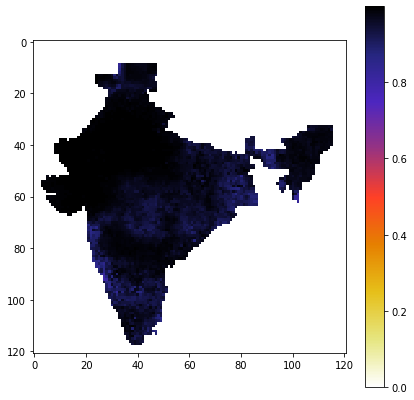

In [ ]:
prisk_75p_monsoon = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 80 percentile

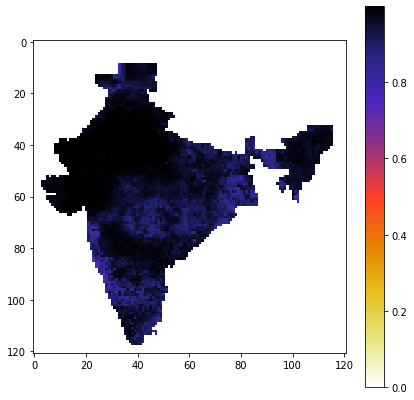

In [ ]:
prisk_80p_monsoon = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 90 percentile

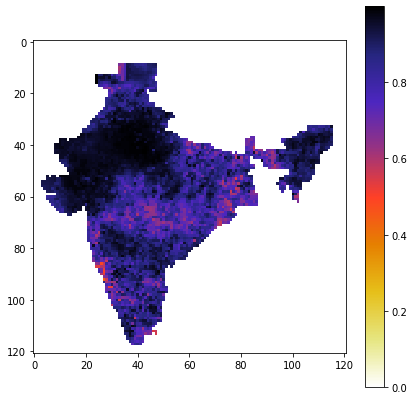

In [ ]:
prisk_90p_monsoon = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

## Using a TMax threshold of 95 percentile

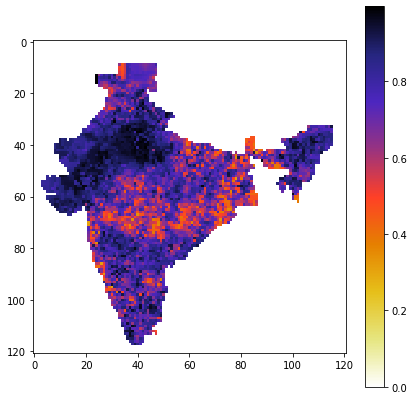

In [ ]:
prisk_95p_monsoon = copy.deepcopy(prisk)
plt.figure(figsize=(7,7))
prisk = np.rot90(prisk, 1)
plt.imshow(prisk, cmap='CMRmap_r', interpolation='nearest')
plt.colorbar()
plt.show()

# Comparison between the plots at different thresholds during the monsoon season

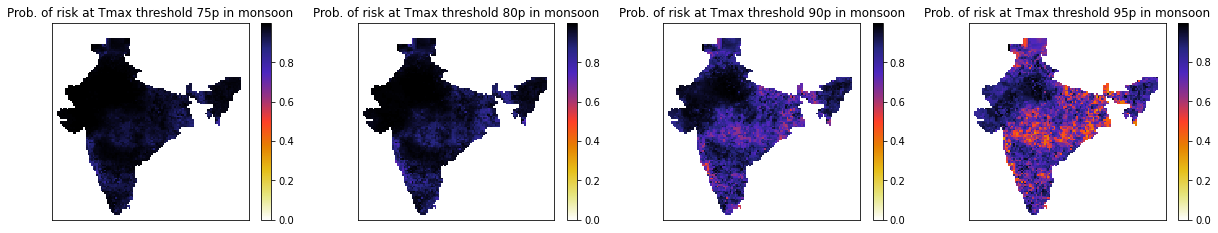

In [ ]:
w=20
h=20
prisk_list = [prisk_75p_monsoon, prisk_80p_monsoon, prisk_90p_monsoon, prisk_95p_monsoon]
title = ['Prob. of risk at Tmax threshold 75p in monsoon', 'Prob. of risk at Tmax threshold 80p in monsoon', 'Prob. of risk at Tmax threshold 90p in monsoon', 'Prob. of risk at Tmax threshold 95p in monsoon']
fig=plt.figure(figsize=(21,21))
counter = 0
for i in range(1, 5):
    fig.add_subplot(5, 4, i)
    id = prisk_list[counter]
    id = np.rot90(id, 1)
    plt.imshow(id, cmap='CMRmap_r', interpolation='nearest')
    plt.colorbar()
    plt.xticks([]),plt.yticks([])
    plt.title(title[counter])
    counter += 1
plt.show()

#### We can see from the above figures that regions closer to desert areas like Rajasthan having high temperature or places in the North-East having high rainfall have a higher probability of risk as compared to the other areas. This is because temperature or rainfall values are extreme in these areas. In comparison, regions in the south-west coast or Central India can be seen as having lower probability of risk, since these regions experience moderate temperature and rainfall throughout the year. As we increase the maximum temperature threshold, lesser regions show possibilities of risk, since they do not cross the higher temperature threshold needed for it to be classified with risk.

#  Comparison between different plots during water year and monsoon season

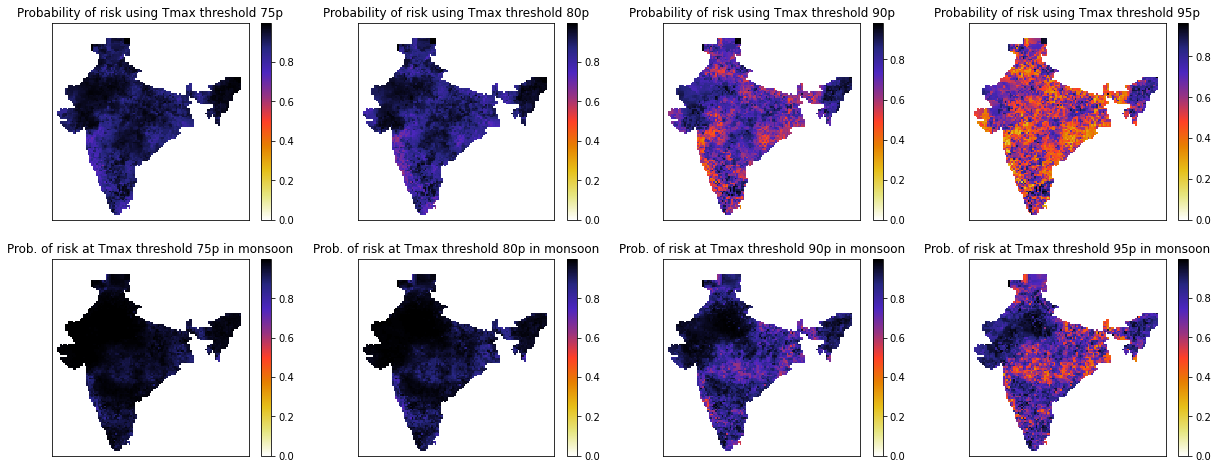

In [ ]:
prisk_list = [prisk_75p, prisk_80p, prisk_90p, prisk_95p, prisk_75p_monsoon, prisk_80p_monsoon, prisk_90p_monsoon, prisk_95p_monsoon]
title = ['Probability of risk using Tmax threshold 75p', 'Probability of risk using Tmax threshold 80p', 'Probability of risk using Tmax threshold 90p', 'Probability of risk using Tmax threshold 95p', 'Prob. of risk at Tmax threshold 75p in monsoon', 'Prob. of risk at Tmax threshold 80p in monsoon', 'Prob. of risk at Tmax threshold 90p in monsoon', 'Prob. of risk at Tmax threshold 95p in monsoon']
fig=plt.figure(figsize=(21,21))
counter = 0
for i in range(1, 9):
    fig.add_subplot(5, 4, i)
    id = prisk_list[counter]
    id = np.rot90(id, 1)
    plt.imshow(id, cmap='CMRmap_r', interpolation='nearest')
    plt.colorbar()
    plt.xticks([]),plt.yticks([])
    plt.title(title[counter])
    counter += 1
plt.show()

#### We can see from the above figures that as compared to the graphs using data of the entire water area, the graphs using monsoon season data have more regions having high risk. The reason behind this is because larger areas show abrupt differences in rainfall during the monsoon season. The regions with moderate rainfall are seen to be having lesser probability of risk, whereas the regions showing extreme rainfall cases have high risk.

# Trend analysis of risk over the years 1951-2015 in one grid

#### The trend analysis of risk have been done on one grid. Different experiments have been performed using different values of maximum temperature thresholds. Some of the observations are shown below.


### Using Tmax threshold of 75 percentile

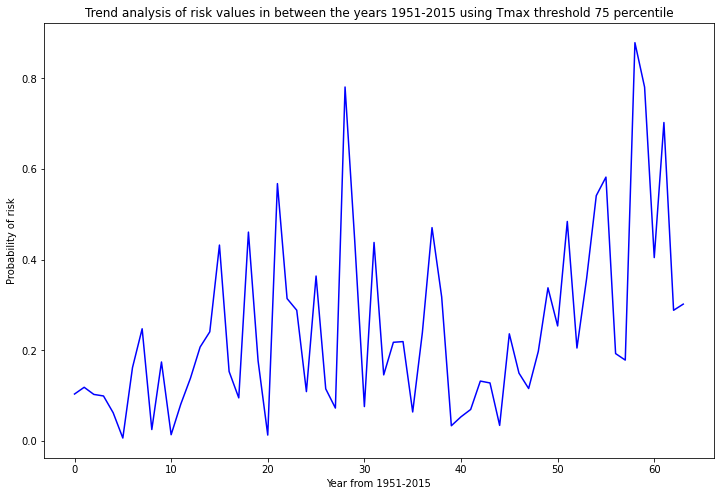

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
prisk_trend_75p = prisk_trend[75][50][:,1]
ax.plot(prisk_trend[75][50][:,1], color='blue')
plt.title("Trend analysis of risk values in between the years 1951-2015 using Tmax threshold 75 percentile")
plt.xlabel("Year from 1951-2015")
plt.ylabel("Probability of risk")
plt.show()

### Using Tmax threshold of 80 percentile

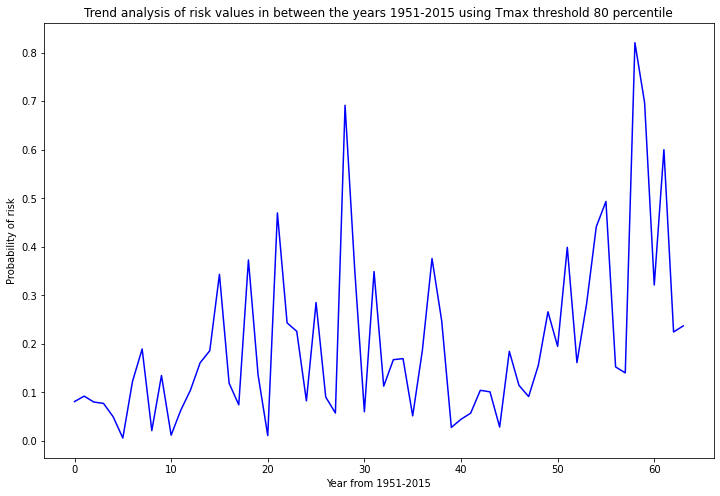

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
prisk_trend_80p = prisk_trend[75][50][:,1]
ax.plot(prisk_trend[75][50][:,1], color='blue')
plt.title("Trend analysis of risk values in between the years 1951-2015 using Tmax threshold 80 percentile")
plt.xlabel("Year from 1951-2015")
plt.ylabel("Probability of risk")
plt.show()

### Using Tmax threshold of 90 percentile

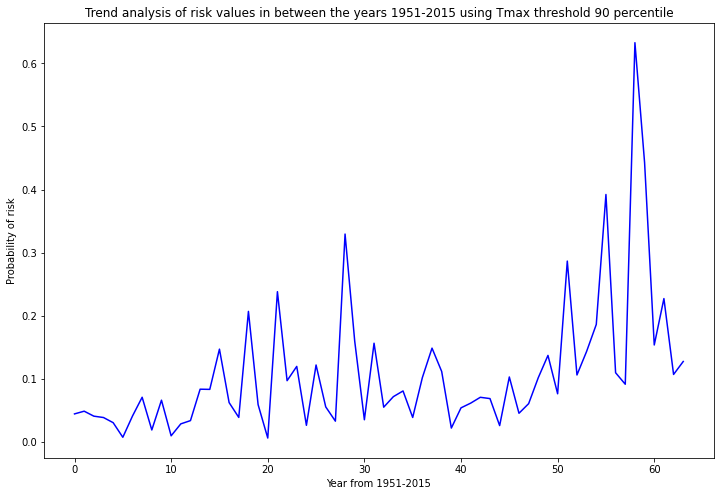

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
prisk_trend_90p = prisk_trend[75][50][:,1]
ax.plot(prisk_trend[75][50][:,1], color='blue')
plt.title("Trend analysis of risk values in between the years 1951-2015 using Tmax threshold 90 percentile")
plt.xlabel("Year from 1951-2015")
plt.ylabel("Probability of risk")
plt.show()

### Using Tmax threshold of 95 percentile

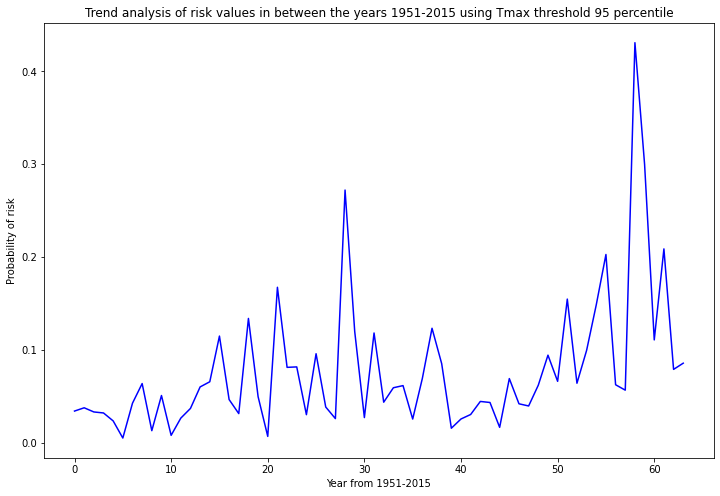

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
prisk_trend_95p = prisk_trend[75][50][:,1]
ax.plot(prisk_trend[75][50][:,1], color='blue')
plt.title("Trend analysis of risk values in between the years 1951-2015 using Tmax threshold 95 percentile")
plt.xlabel("Year from 1951-2015")
plt.ylabel("Probability of risk")
plt.show()

## Comparison of the plots at different thresholds

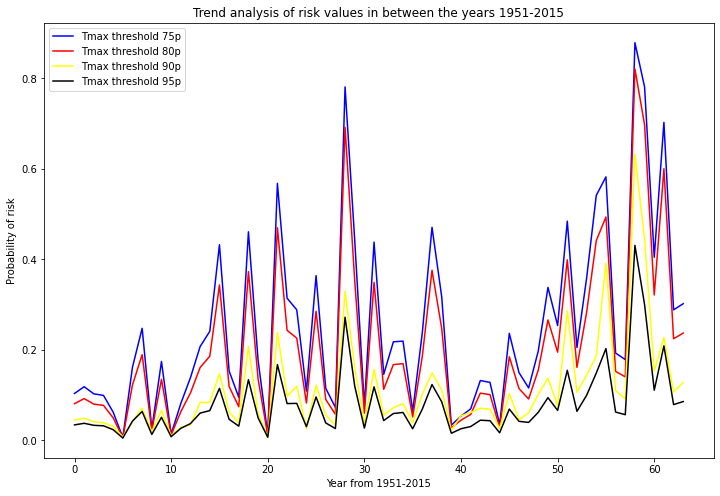

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(prisk_trend_75p, color='blue', label = 'Tmax threshold 75p')
ax.plot(prisk_trend_80p, color='red', label = 'Tmax threshold 80p')
ax.plot(prisk_trend_90p, color='yellow', label = 'Tmax threshold 90p')
ax.plot(prisk_trend_95p, color='black', label = 'Tmax threshold 95p')
plt.title("Trend analysis of risk values in between the years 1951-2015")
plt.xlabel("Year from 1951-2015")
plt.ylabel("Probability of risk")
plt.legend()
plt.show()

#### We can see from the above plots that the risk in general have a slightly upward trend over the years. This is because of the changes in temperature and rainfall that we are experiencing due to global warming. Temperature and precipitation values often leads to extreme values in most of the regions. The changes with respect to the maximum threshold value can also be seen. As we increase the maximum temperature threshold, lesser possibilities of risk are observed, since they do not cross the higher temperature threshold needed for it to be classified as risk.